# Importación de librerías

In [1]:
import pandas as pd
import numpy as np

# Importación de productos_mercadona.csv

In [66]:
df = pd.read_csv("/content/productos_mercadona.csv")
df.head(3)

,id,name,description,price,reference_price,reference_unit,subcategory_2_nivel_id,subcategory_2_nivel_name,category_id,category_name,subcategory_id,subcategory_name
0,4241.0,"Aceite de oliva 0,4º Hacendado",Garrafa 5.0 l,19.95,3.990,L,420,Aceite de oliva,12,"Aceite, especias y salsas",112,"Aceite, vinagre y sal"
1,4240.0,"Aceite de oliva 0,4º Hacendado",Botella 1.0 l,4.45,4.450,L,420,Aceite de oliva,12,"Aceite, especias y salsas",112,"Aceite, vinagre y sal"
2,4717.0,Aceite de oliva virgen extra Hacendado,Garrafa 3.0 l,15.85,5.284,L,420,Aceite de oliva,12,"Aceite, especias y salsas",112,"Aceite, vinagre y sal"


# Análisis inicial del DataFrame

### Dimensión, estructura y tipos de datos

Utilizamos df.info() para mostrar la estructura del DataFrame. Este paso nos permite:

1. Ver cuántas filas y columnas tiene el conjunto de datos

2. Identificar los tipos de datos

3. Detectar columnas que deben ser convertidas, como insert_date (que debería ser tipo fecha)

4. Evaluar el uso de memoria

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4805 entries, 0 to 4804
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4805 non-null   float64
 1   name                      4805 non-null   object 
 2   description               4805 non-null   object 
 3   price                     4805 non-null   float64
 4   reference_price           4805 non-null   float64
 5   reference_unit            4805 non-null   object 
 6   subcategory_2_nivel_id    4805 non-null   int64  
 7   subcategory_2_nivel_name  4805 non-null   object 
 8   category_id               4805 non-null   int64  
 9   category_name             4805 non-null   object 
 10  subcategory_id            4805 non-null   int64  
 11  subcategory_name          4805 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 450.6+ KB


### Duplicados y nulos

Eliminamos filas duplicadas completas, es decir, aquellas donde todos los valores de todas las columnas son iguales.

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape[0]

4805

Tras ejecutar df.drop_duplicates(), el número de filas no se redujo. Esto indica que no existían registros completamente duplicados.

Calculamos el número de valores nulos por cada columna.

In [ ]:
df.isnull().sum()

,0
id,0
name,0
description,0
price,0
reference_price,0
reference_unit,0
subcategory_2_nivel_id,0
subcategory_2_nivel_name,0
category_id,0
category_name,0


Como se puede ver en la tabla, no hay valores faltantes en ninguna de las columnas, todas las celdas están completas. Esto indica que este conjunto de datos no requiere limpieza adicional por datos nulos.

# Detección y corrección de anomalías en los precios

Analizamos la distribución general de los precios. El resumen estadístico de las columnas price y reference_price nos permite detectar anomalías como valores extremos, alta dispersión, etc.


In [ ]:
df[['price', 'reference_price']].describe()

,price,reference_price
count,4805.000000,4805.000000
mean,8.515453,7.297446
std,115.645258,12.488800
min,0.200000,0.003000
25%,1.500000,1.990000
50%,2.350000,4.584000
75%,3.950000,9.231000
max,4549.050000,462.500000


El análisis estadístico de las columnas price (precio del producto) y reference_price (precio por unidad de medida, como €/kg o €/l) revela varios aspectos clave. El precio medio (price) es de 8,52€, pero la desviación estándar es muy alta (115,65€), lo que indica una gran dispersión de valores.
El valor máximo de price llega a los 4549€, mientras que la mediana es de solo 2,35€. Esto muestra una distribución muy sesgada hacia la derecha, con unos pocos productos extremadamente caros que distorsionan la media. La variable reference_price presenta un comportamiento similar: el máximo es de 462,50€, frente a una mediana de 4,58€. Estos resultados dejan claro que hay valores atípicos o anómalos que deben tratarse antes de seguir con el análisis. El siguiente paso será visualizarlos e identificarlos para limpiar el dataset y evitar conclusiones erróneas.

Con el objetivo de detectar visualmente la presencia de valores extremos o errores de registro en los precios, generamos dos diagramas de caja: boxplot del campo price y boxplot del campo reference_price.

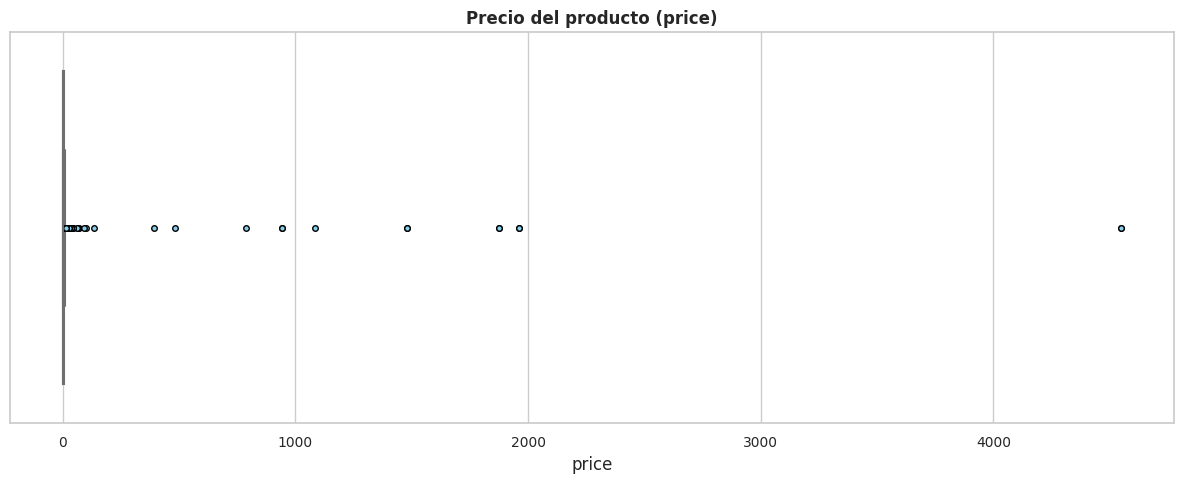

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme(style="whitegrid", palette="pastel")

flier_props = dict(marker='o', markerfacecolor='skyblue', markersize=4, linestyle='none', markeredgecolor='black')

plt.figure(figsize=(12, 5))
sns.boxplot(
    x=df['price'],
    color='skyblue',
    fliersize=4,
    linewidth=1.5,
    flierprops=flier_props
)

plt.title('Precio del producto (price)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

Podemos observar que la mayoría de los productos se concentran en un rango de precios bajo. Sin embargo, existen numerosos valores extremos que superan los 1000 €, e incluso algunos que alcanzan más de 4000 €. Estos precios son claramente atípicos y probablemente se deban a errores en el registro de los datos.

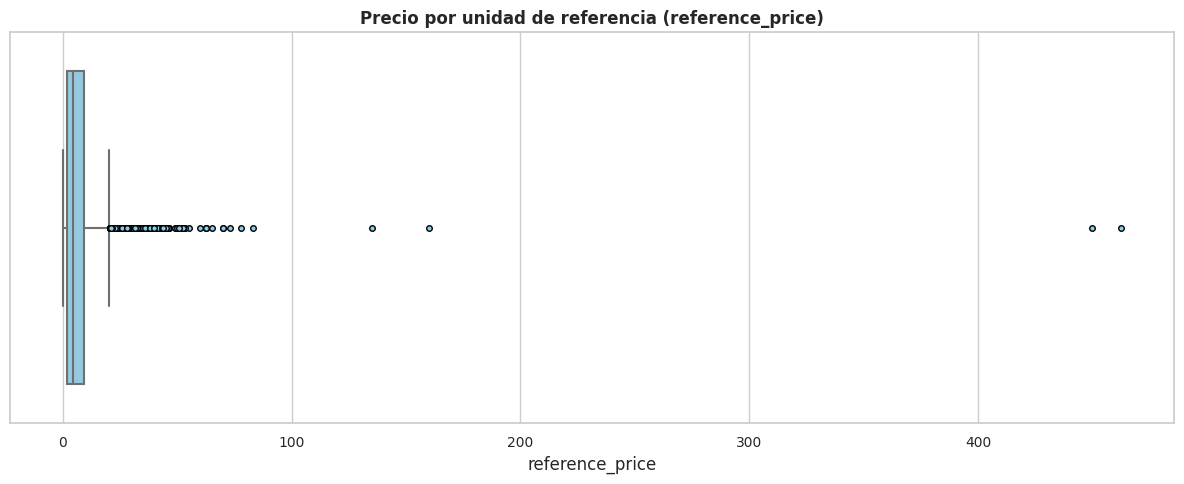

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")

flier_props = dict(marker='o', markerfacecolor='skyblue', markersize=4, linestyle='none', markeredgecolor='black')

plt.figure(figsize=(12, 5))
sns.boxplot(
    x=df['reference_price'],
    color='skyblue',
    fliersize=4,
    linewidth=1.5,
    flierprops=flier_props)

plt.title('Precio por unidad de referencia (reference_price)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

Aunque la mayoría de los valores de reference_price se agrupan en un rango bajo, el gráfico revela la presencia de algunos valores atípicos muy alejados del resto. Se observan precios por unidad de referencia que superan los 400 €, lo cual resulta claramente inusual y poco realista. Este comportamiento confirma lo ya indicado en el resumen estadístico: existe una gran dispersión y algunos valores extremos que conviene revisar para evitar sesgos en el análisis posterior.

Ambas variables contienen valores atípicos extremos que deben ser tratados con precaución.

Para entender el origen de los precios anormalmente altos, vamos a examinar en detalle los productos con los valores más elevados en las columnas price y reference_price. Esto nos ayudará a identificar si los outliers están asociados a ciertas categorías, errores de registro o características del producto (como formatos o presentaciones especiales).

In [ ]:
# Ordenamos el DataFrame por la columna 'price' en orden descendente
# para obtener los productos con el precio más alto
top_20_price = df.sort_values(by='price', ascending=False).head(20)
top_20_price


,id,name,description,price,reference_price,reference_unit,subcategory_2_nivel_id,subcategory_2_nivel_name,category_id,category_name,subcategory_id,subcategory_name
1877,24706.0,Alistado mediano congelado,Granel kg,4549.05,45.950,kg,516,Marisco,17,Congelados,150,Marisco
3909,24706.0,Alistado mediano congelado,Granel kg,4549.05,45.950,kg,272,Marisco,2,Marisco y pescado,32,Marisco
3925,24487.0,Bocas de cangrejo pequeñas congeladas,Granel kg,1960.20,19.800,kg,272,Marisco,2,Marisco y pescado,32,Marisco
1889,24487.0,Bocas de cangrejo pequeñas congeladas,Granel kg,1960.20,19.800,kg,516,Marisco,17,Congelados,150,Marisco
1875,24708.0,Alistado pequeño congelado,Granel kg,1876.05,18.950,kg,516,Marisco,17,Congelados,150,Marisco
3930,24708.0,Alistado pequeño congelado,Granel kg,1876.05,18.950,kg,272,Marisco,2,Marisco y pescado,32,Marisco
3913,24701.0,Gamba blanca pequeña Hacendado congelada,Granel kg,1480.05,14.950,kg,272,Marisco,2,Marisco y pescado,32,Marisco
1880,24701.0,Gamba blanca pequeña Hacendado congelada,Granel kg,1480.05,14.950,kg,516,Marisco,17,Congelados,150,Marisco
3911,83490.0,Langostino cocido,Granel kg,1084.05,10.950,kg,272,Marisco,2,Marisco y pescado,32,Marisco
3907,24147.0,Gambón congelado,Granel kg,940.50,9.500,kg,272,Marisco,2,Marisco y pescado,32,Marisco


Durante el análisis de los productos con los precios totales más altos (price), observamos dos patrones claramente diferenciados. Por un lado, hay productos premium como el jamón ibérico, cuyo precio elevado está justificado por su peso (más de 7 kg) y su categoría gourmet. Por otro lado, encontramos casos sospechosos, especialmente en productos del mar como gambón congelado o langostino cocido, donde el precio total supera de forma desproporcionada al precio por kilo (reference_price).

En lugar de eliminar directamente estos registros, lo cual podría hacernos perder información útil, aplicaremos una corrección automatizada en aquellos casos que cumplan las siguientes condiciones:

- la unidad de referencia es kilogramos (reference_unit = 'kg');

- el valor en price es más de 90 veces superior a reference_price;

- precio es mayor a 30€ (para evitar corregir productos baratos con pequeñas variaciones);

- el nombre del producto no contiene las palabras jamón ni bellota, ya que los jamones suelen tener precios altos legítimos.

Si se cumplen todos estos criterios, consideramos que hay una alta probabilidad de error y procederemos a dividir el valor de price entre 100, para llevarlo a un rango razonable. Además, marcaremos estas filas con una nueva columna price_corrected = True, de modo que podamos identificarlas fácilmente en el análisis posterior.

In [67]:
# Condición para detectar errores de precio (excluyendo jamón)
condicion_correccion = (
    (df['reference_unit'] == 'kg') &
    ((df['price'] / df['reference_price']) > 90) &
    (df['price'] > 30) &
    (~df['name'].str.contains('jamón|bellota', case=False, na=False)))

# Mostramos cuántas filas se van a corregir
print(f"Productos corregidos (excluyendo jamón): {condicion_correccion.sum()}")

# Aplicamos corrección dividiendo el precio por 100
df.loc[condicion_correccion, 'price'] = df.loc[condicion_correccion, 'price'] / 100

# Añadimos una nueva columna con un flag de corrección
df['price_corrected'] = False
df.loc[condicion_correccion, 'price_corrected'] = True

Productos corregidos (excluyendo jamón): 12


Tras aplicar los criterios definidos para detectar precios anómalos, se identificaron 12 productos cuyo precio total (price) era desproporcionadamente alto en comparación con su reference_price. Estos productos fueron corregidos automáticamente dividiendo su precio por 100. Como medida adicional, se añadió una nueva columna price_corrected, que permite identificar fácilmente qué filas han sido modificadas. Esta corrección ayuda a mantener la integridad del análisis sin eliminar registros valiosos, reduciendo así el impacto de posibles errores de carga o tipográficos.

Ahora hacemos lo mismo pero con la columna 'reference_price' que indica el precio por unidad (€/kg, €/l, etc.)

In [ ]:
top_20_reference_price = df.sort_values(by='reference_price', ascending=False).head(20)
top_20_reference_price

,id,name,description,price,reference_price,reference_unit,subcategory_2_nivel_id,subcategory_2_nivel_name,category_id,category_name,subcategory_id,subcategory_name,price_corrected
48,8370.0,Azafrán hebra Hacendado,Paquete 0.0004 kg,1.85,462.500,100 g,840,Colorante y pimentón,12,"Aceite, especias y salsas",115,Especias,False
47,34116.0,Azafrán molido Hacendado,Paquete 0.0004 kg,1.80,450.000,100 g,840,Colorante y pimentón,12,"Aceite, especias y salsas",115,Especias,False
1613,58298.0,Jamón bellota ibérico 100% cortado a tapas,Paquete 0.09 kg,14.40,160.000,kg,298,Jamón serrano,4,Charcutería y quesos,50,Jamón serrano,False
1612,58280.0,Jamón bellota ibérico cortado a tapas,Paquete 0.09 kg,12.15,135.000,kg,298,Jamón serrano,4,Charcutería y quesos,50,Jamón serrano,False
1647,52170.0,Foie gras entero de pato Hacendado,Paquete 0.1 kg,8.30,83.000,kg,314,Paté,4,Charcutería y quesos,58,Paté y sobrasada,False
1611,58278.0,Jamón cebo ibérico cortado a tapas,Paquete 0.09 kg,7.02,78.000,kg,298,Jamón serrano,4,Charcutería y quesos,50,Jamón serrano,False
4077,80418.0,Filetes de anchoa en aceite de oliva Hacendado,Lata 0.074 kg,3.65,73.000,kg,278,Salazones,2,Marisco y pescado,36,Salazones y ahumados,False
3719,41163.0,Corrector stick Deliplus 03,None 0.005 kg,3.50,70.000,100 g,671,Correctores y prebase,22,Maquillaje,206,Bases de maquillaje y corrector,False
1192,35396.0,Foie gras de pato fresco,Paquete 0.135 kg,9.45,70.000,kg,282,Pavo y otras aves,3,Carne,38,Aves y pollo,False
1598,58418.0,Lomo de bellota ibérico cortado a máquina,Paquete 0.09 kg,5.85,65.000,kg,302,Lomo y otros,4,Charcutería y quesos,51,Embutido curado,False


El análisis de los productos con los valores más altos en reference_price revela que se trata de productos premium con precios elevados por unidad de medida que son coherentes con su naturaleza. Por ejemplo, el azafrán aparece con precios superiores a 450€/100 g, lo cual es habitual dado su valor en el mercado. También figuran productos como foie gras o jamón ibérico en porciones pequeñas, donde el precio por kilo puede superar fácilmente los 100€.

No se observan inconsistencias entre el precio total (price), el peso declarado y el reference_price. Por tanto, no es necesario aplicar correcciones en este caso.

In [ ]:
df[['price', 'reference_price']].describe()

,price,reference_price
count,4805.000000,4805.000000
mean,3.677165,7.297446
std,10.009595,12.488800
min,0.200000,0.003000
25%,1.500000,1.990000
50%,2.350000,4.584000
75%,3.950000,9.231000
max,481.500000,462.500000


Tras aplicar la corrección a los valores anómalos en la columna price, se observa una mejora notable en la calidad de los datos. La media de price bajó de 8,51 € a 3,68 €, lo que indica que se redujo el efecto de los valores extremos. La desviación estándar también disminuyó drásticamente, de 115,65 € a 10,01 €, lo que refleja una distribución mucho más estable. El valor máximo ahora es 481,50 €, un precio alto pero realista, correspondiente a productos gourmet como el jamón de bellota. Los valores de reference_price no han cambiado, ya que no se aplicó ninguna modificación a esa columna.
Podemos afirmar que la distribución de precios se ha corregido de manera efectiva, resultando en un conjunto de datos más limpio y fiable para el análisis posterior.



In [ ]:
top_10_price = df.sort_values(by='price', ascending=False).head(10)
top_10_price

,id,name,description,price,reference_price,reference_unit,subcategory_2_nivel_id,subcategory_2_nivel_name,category_id,category_name,subcategory_id,subcategory_name,price_corrected
1631,58297.0,Jamón bellota ibérico 100% Covap,Pieza 9.0 kg,481.5000,53.500,kg,298,Jamón serrano,4,Charcutería y quesos,50,Jamón serrano,False
1630,58286.0,Jamón de bellota ibérico 50% La Hacienda del I...,Pieza 9.0 kg,391.5000,43.500,kg,298,Jamón serrano,4,Charcutería y quesos,50,Jamón serrano,False
1629,8566.0,Jamón de cebo ibérico La Hacienda del Ibérico,Pieza 8.5 kg,136.0000,16.000,kg,298,Jamón serrano,4,Charcutería y quesos,50,Jamón serrano,False
1603,58417.0,Lomo de bellota ibérico Juan del Roble,Pieza 1.9 kg,98.8000,52.000,kg,302,Lomo y otros,4,Charcutería y quesos,51,Embutido curado,False
1632,12031.0,Jamón de Teruel raza Duroc El Cierzo,Pieza 7.5 kg,89.0000,11.867,kg,298,Jamón serrano,4,Charcutería y quesos,50,Jamón serrano,False
1604,58260.0,Caña de lomo cebo ibérico La Hacienda del ibérico,Pieza 1.6 kg,68.8000,43.000,kg,302,Lomo y otros,4,Charcutería y quesos,51,Embutido curado,False
1627,58293.0,Jamón serrano Incarlopsa,Pieza 7.1 kg,65.0000,9.559,kg,298,Jamón serrano,4,Charcutería y quesos,50,Jamón serrano,False
1628,58154.0,Paleta de cebo ibérica La Hacienda del Ibérico,Pieza 5.0 kg,62.0000,15.500,kg,298,Jamón serrano,4,Charcutería y quesos,50,Jamón serrano,False
3909,24706.0,Alistado mediano congelado,Granel kg,45.4905,45.950,kg,272,Marisco,2,Marisco y pescado,32,Marisco,True
1877,24706.0,Alistado mediano congelado,Granel kg,45.4905,45.950,kg,516,Marisco,17,Congelados,150,Marisco,True


Al revisar nuevamente los productos con los precios más altos, se observa que los valores elevados actuales son coherentes con la naturaleza de los productos. Por tanto, no se detectan anomalías en esta parte del conjunto de datos.

Es importante revisar también los productos con los valores más bajos de price. Este análisis nos permite detectar posibles errores en el rango inferior, como precios inusualmente bajos causados por errores de entrada o redondeo. A continuación, mostramos los 10 productos con el precio más bajo del conjunto de datos.

In [ ]:
# Seleccionamos los 10 productos con el precio más bajo
top_10_mas_baratos = df.sort_values(by='price', ascending=True).head(10)
top_10_mas_baratos

,id,name,description,price,reference_price,reference_unit,subcategory_2_nivel_id,subcategory_2_nivel_name,category_id,category_name,subcategory_id,subcategory_name,price_corrected
4241,85788.0,Rosquillas al cacao Hacendado,None 0.037 kg,0.20,5.500,kg,335,Pastelitos surtidos,5,Panadería y pastelería,66,Bollería envasada,False
4245,22140.0,Rollo con sabor avellana Hacendado,None 0.042 kg,0.23,5.500,kg,335,Pastelitos surtidos,5,Panadería y pastelería,66,Bollería envasada,False
4244,22139.0,Rollo con sabor nata Hacendado,None 0.042 kg,0.23,5.500,kg,335,Pastelitos surtidos,5,Panadería y pastelería,66,Bollería envasada,False
3076,69912.0,Tomate pera,Pieza 0.12 kg,0.24,1.980,kg,855,Tomate,1,Fruta y verdura,29,Verdura,False
162,27078.0,Agua mineral pequeña Cortes,Botella 0.5 l,0.24,0.480,L,525,Agua sin gas,18,Agua y refrescos,156,Agua,False
158,28270.0,Agua mineral grande Cortes,Botella 1.5 l,0.25,0.167,L,525,Agua sin gas,18,Agua y refrescos,156,Agua,False
164,28296.0,Agua mineral pequeña Cortes tapón infantil,Botella 0.33 l,0.26,0.788,L,525,Agua sin gas,18,Agua y refrescos,156,Agua,False
2979,3824.0,Banana,Pieza 0.17 kg,0.26,1.500,kg,853,Plátano y uva,1,Fruta y verdura,27,Fruta,False
3083,69935.0,Tomate negro,Pieza 0.1 kg,0.27,2.700,kg,855,Tomate,1,Fruta y verdura,29,Verdura,False
3096,69320.0,Pimiento verde freír,Pieza 0.1 kg,0.27,2.700,kg,857,Calabacín y pimiento,1,Fruta y verdura,29,Verdura,False


El análisis de los productos con los precios más bajos no revela ninguna anomalía. Aunque los valores de price están por debajo de los 0,30€, estos precios son coherentes con el tipo de producto, su formato y el peso o volumen declarado. Por ejemplo, productos de bollería en paquetes pequeños y botellas de agua en diferentes formatos presentan precios bajos esperables, con reference_price también consistentes. En consecuencia, no se requiere ninguna corrección en este segmento del dataset.

Ahora vamos a ver también los productos con los precios por unidad (reference_price) más bajos. Así podemos comprobar si hay valores demasiado bajos que no tienen sentido o si todo está correcto.

In [ ]:
# Seleccionamos los 10 productos con el reference_price más bajo
top_10_mas_baratos_reference_price = df.sort_values(by='reference_price', ascending=True).head(10)
top_10_mas_baratos_reference_price

,id,name,description,price,reference_price,reference_unit,subcategory_2_nivel_id,subcategory_2_nivel_name,category_id,category_name,subcategory_id,subcategory_name,price_corrected
3606,49319.0,Palillos redondos Bosque Verde,Bote 500.0 ud,1.25,0.003,ud,772,"Cubiertos, vajilla y mantel",26,Limpieza y hogar,243,Menaje y conservación de alimentos,False
2942,79007.0,Bastoncillos de algodón 100% Deliplus,Caja 200.0 ud,0.90,0.005,ud,686,Botiquín,23,Fitoterapia y parafarmacia,214,Parafarmacia,False
2468,79407.0,Discos desmaquillantes Deliplus redondos algod...,Paquete 1.0 ud,1.05,0.007,ud,595,Limpieza de cara,20,Cuidado facial y corporal,185,Cuidado e higiene facial,False
3618,49544.0,Servilleta papel Bosque Verde,Paquete 200.0 ud,1.25,0.007,ud,838,Servilletas,26,Limpieza y hogar,238,Papel higiénico y celulosa,False
3630,47609.0,Pañuelos de papel Extra Suaves Bosque Verde,Caja 200.0 ud,1.25,0.007,ud,759,Pañuelos,26,Limpieza y hogar,238,Papel higiénico y celulosa,False
3632,47620.0,Pañuelos de papel Extra Suaves Bosque Verde,Paquete 10.0 ud,1.05,0.011,ud,759,Pañuelos,26,Limpieza y hogar,238,Papel higiénico y celulosa,False
804,79603.0,Toallitas bebé frescas & perfumadas Deliplus,Pack-3 240.0 ud,3.00,0.013,ud,695,Toallitas,24,Bebé,217,Toallitas y pañales,False
805,79427.0,Toallitas bebé frescas & perfumadas Deliplus,Paquete 80.0 ud,1.05,0.014,ud,695,Toallitas,24,Bebé,217,Toallitas y pañales,False
2471,79408.0,Discos desmaquillantes Deliplus ovalados algod...,Paquete 1.0 ud,1.50,0.015,ud,595,Limpieza de cara,20,Cuidado facial y corporal,185,Cuidado e higiene facial,False
3628,47291.0,Papel higiénico húmedo WC Bosque Verde,Paquete 100.0 ud,1.55,0.016,ud,755,Papel higiénico,26,Limpieza y hogar,238,Papel higiénico y celulosa,False


Al observar los productos con el precio de referencia más bajo, notamos que se trata principalmente de artículos de uso doméstico diario, como:

- pañuelos de papel;

- servilletas;

- bastoncillos de algodón;

- filtros de café;

- discos desmaquillantes.

Estos productos suelen venderse en formatos muy ligeros o individuales, lo cual explica su bajo precio por unidad de medida. Los valores observados (de 0.003 a 0.008 €/ud) son coherentes con su naturaleza y volumen, por lo tanto, no requieren corrección.

# Análisis de valores únicos en campos clave

### Depuración de duplicados y errores de categorización por ID

En esta etapa analizamos la cantidad de valores únicos en columnas esenciales del conjunto de datos, como el identificador del producto, el nombre, la categoría y la subcategoria. Conocer los valores únicos es útil para evaluar la diversidad de los datos y detectar posibles inconsistencias.

In [47]:
num_unique_id = df['id'].nunique()
num_unique_id

4537

El dataset contiene 4805 registros y 4537 identificadores únicos (id), lo que significa que hay 268 productos repetidos según su id.
Esto puede deberse a duplicaciones exactas, distintas versiones de un mismo producto o errores de carga. Vamos a identificar los id que aparecen más de una vez y analizar sus diferencias.

In [4]:
# Contamos cuántas veces aparece cada 'id'
id_counts = df['id'].value_counts()

# Filtramos los 'id' que se repiten más de una vez
duplicados_id = id_counts[id_counts > 1].index
print(f'Cantidad de filas que tienen los id duplicados: {len(duplicados_id)}')

# Extraemos las filas correspondientes a esos 'id' duplicados
df_duplicados_id = df[df['id'].isin(duplicados_id)].copy()

Cantidad de filas que tienen los id duplicados: 268


In [5]:
# Mostramos 20 filas como ejemplo para analizarlos manualmente
df_duplicados_id.sort_values('id').head(20)

,id,name,description,price,reference_price,reference_unit,subcategory_2_nivel_id,subcategory_2_nivel_name,category_id,category_name,subcategory_id,subcategory_name,price_corrected
1363,1564.0,Costilla de cerdo ibérico adobada,Bandeja 0.5 kg,3.43,6.850,kg,288,Empanados y elaborados,3,Carne,45,Empanados y elaborados,False
1256,1564.0,Costilla de cerdo ibérico adobada,Bandeja 0.5 kg,3.43,6.850,kg,280,Cerdo,3,Carne,37,Cerdo,False
1212,2137.0,Flautas de pollo y queso,Bandeja 0.28 kg,2.20,8.059,kg,281,Pollo,3,Carne,38,Aves y pollo,False
1352,2137.0,Flautas de pollo y queso,Bandeja 0.28 kg,2.20,8.059,kg,288,Empanados y elaborados,3,Carne,45,Empanados y elaborados,False
1353,2169.0,Flautas de bacón y queso,Bandeja 0.28 kg,2.20,7.972,kg,288,Empanados y elaborados,3,Carne,45,Empanados y elaborados,False
1266,2169.0,Flautas de bacón y queso,Bandeja 0.28 kg,2.20,7.972,kg,280,Cerdo,3,Carne,37,Cerdo,False
1797,2228.0,Solomillo de cerdo marinado congelado,Paquete 0.8 kg,6.24,7.800,kg,511,Carne,17,Congelados,148,Carne,False
1241,2228.0,Solomillo de cerdo marinado congelado,Paquete 0.8 kg,6.24,7.800,kg,290,Carne congelada,3,Carne,47,Carne congelada,False
1354,2715.0,Filetes lomo de cerdo adobado,Bandeja 0.47 kg,3.29,7.000,kg,288,Empanados y elaborados,3,Carne,45,Empanados y elaborados,False
1262,2715.0,Filetes lomo de cerdo adobado,Bandeja 0.47 kg,3.29,7.000,kg,280,Cerdo,3,Carne,37,Cerdo,False


En esta revisión manual de productos con id duplicado, observamos que las filas comparten los mismos valores en todas las columnas clave como name, description, price, y reference_price, pero se diferencian en la categoria y subcategorís asignadas. Esto indica que se trata del mismo producto clasificado en diferentes subcategorías.

Hemos decidido no forzar la asignación de cada producto a una única categoría por las siguientes razones:

1. Algunos productos tienen una naturaleza ambigua o transversal, y aparecen de forma legítima en más de una categoría o subcategoría.

2. Al eliminar una de esas asignaciones, existe el riesgo de dejar ciertas categorías incompletas, lo que puede afectar negativamente al análisis posterior (por ejemplo, al comparar precios medios, cantidades o cobertura de surtido).

3. Si forzamos la asignación a una sola categoría, podríamos obtener una categoría "con datos completos" y otra artificialmente reducida, lo cual distorsionaría los resultados del análisis comparativo entre supermercados o entre familias de productos.

Por estas razones, hemos optado por conservar todos los registros tal como aparecen originalmente, permitiendo que un mismo producto pueda pertenecer a varias categorías si así se refleja en los datos. Esto nos permite mantener una visión más completa y precisa del surtido real.

Verificamos si existen productos duplicados que tienen todas las características iguales (nombre, descripción, precio, unidad de referencia, categorías y subcategorías), pero con identificadores id diferentes. Para detectarlos, agrupamos por todas las columnas excepto el id, y seleccionamos aquellos grupos en los que aparece más de un id distinto.

In [68]:
# Especificamos las columnas que deben coincidir completamente (excepto 'id')
columnas_comparacion = [
    'name', 'description', 'price', 'reference_price', 'reference_unit',
    'category_id', 'category_name',
    'subcategory_id', 'subcategory_name',
    'subcategory_2_nivel_id', 'subcategory_2_nivel_name']

# Agrupamos por esas columnas y contamos cuántos id distintos hay en cada grupo
grupos = df.groupby(columnas_comparacion)['id'].nunique().reset_index(name='conteo_id')

# Seleccionamos solo los grupos donde hay más de un id distinto
grupos_con_multiples_id = grupos[grupos['conteo_id'] > 1]

# Hacemos merge para extraer las filas originales que coinciden con estos grupos
df_casi_igual_id_dist = df.merge(
    grupos_con_multiples_id.drop(columns='conteo_id'),
    on=columnas_comparacion,
    how='inner')
df_casi_igual_id_dist

,id,name,description,price,reference_price,reference_unit,subcategory_2_nivel_id,subcategory_2_nivel_name,category_id,category_name,subcategory_id,subcategory_name,price_corrected
0,12364.0,Huevos sorpresa de chocolate Hacendado dibujo,None 0.06 kg,1.8,30.000,kg,386,Chocolatinas,9,"Azúcar, caramelos y chocolate",92,Chocolate,False
1,12362.0,Huevos sorpresa de chocolate Hacendado dibujo,None 0.06 kg,1.8,30.000,kg,386,Chocolatinas,9,"Azúcar, caramelos y chocolate",92,Chocolate,False
2,70705.0,Bocaditos en gelatina gato adulto Delikuit,Caja 0.8 kg,2.3,2.875,kg,715,Alimentación húmeda,25,Mascotas,222,Gato,False
3,70704.0,Bocaditos en gelatina gato adulto Delikuit,Caja 0.8 kg,2.3,2.875,kg,715,Alimentación húmeda,25,Mascotas,222,Gato,False


Detectamos dos pares de productos completamente idénticos, pero con identificadores id distintos. Todas las demás características — nombre, descripción, precio, unidad y categorías — coinciden por completo. Esto indica que se han cargado duplicados del mismo producto en el sistema. Para evitar distorsiones en los análisis posteriores, conservaremos solo una fila por producto y eliminaremos los duplicados.

In [69]:
# Eliminamos productos duplicados que solo difieren por el id
df = df.drop_duplicates(
        subset=[
        'name', 'description', 'price', 'reference_price', 'reference_unit',
        'subcategory_2_nivel_id', 'subcategory_2_nivel_name',
        'category_id', 'category_name', 'subcategory_id', 'subcategory_name'],
        keep='first').reset_index(drop=True)

# Mostramos el nuevo tamaño del dataset después de eliminar duplicados
df.shape

(4803, 13)

###  Análisis y estandarización de nombres de productos

Calculamos cuántos nombres de productos distintos existen en la columna name.

In [70]:
num_unique_name = df['name'].nunique()
num_unique_name

4144

En el conjunto de datos hay 4537 id únicos, pero solo 4144 nombres de producto diferentes. Esto significa que algunos nombres se repiten, lo que sugiere que un mismo producto puede estar registrado bajo distintos id. Probablemente se trata de diferentes presentaciones, tamaños o duplicados. Vamos a identificar los nombres que están asociados a más de un id, y analizaremos si realmente se trata del mismo producto o no.

In [20]:
# Agrupamos por nombre de producto y contamos cuántos id distintos hay para cada nombre
conteo_id_por_nombre = (
    df.groupby('name')['id']
    .nunique()
    .reset_index(name='conteo_id'))

# Filtramos aquellos nombres que están asociados a más de un id
nombres_repetidos = conteo_id_por_nombre[conteo_id_por_nombre['conteo_id'] > 1]

# Ordenamos por número de id distintos asociados
nombres_repetidos = nombres_repetidos.sort_values(by='conteo_id', ascending=False)
nombres_repetidos

,name,conteo_id
3452,Refresco Coca-Cola Zero azúcar,8
812,Cerveza Clásica Steinburg,8
3450,Refresco Coca-Cola,8
811,Cerveza Amstel,6
3964,Tónica original Schweppes,5
...,...,...
4141,Zumo pura naranja Hacendado,2
3963,Tónica Nordic Mist,2
3962,Tónica Hacendado,2
3895,Tomate triturado Hacendado,2


Hemos detectado que 284 nombres de productos aparecen asociados a más de un id distinto en el dataset. Esto puede deberse a diferentes formatos o presentaciones (por ejemplo, distintos tamaños o volúmenes), o duplicaciones accidentales durante la carga de los datos.

Ahora extraemos del dataframe original todas las filas donde el campo name pertenece a esta lista y las ordenamos por name e id. Esto facilita la revisión visual y nos permite comprobar si realmente existen diferencias justificadas entre los registros con el mismo nombre o si se trata simplemente de duplicación con diferentes identificadores.

In [48]:
# Creamos una lista con los nombres que están asociados a más de un id
nombres_duplicados = nombres_repetidos['name'].tolist()

# Filtramos el dataframe original para quedarnos solo con los nombres duplicados
df_nombres_duplicados = df[df['name'].isin(nombres_duplicados)]

# Ordenamos por nombre y luego por ID para facilitar el análisis visual
df_nombres_duplicados = df_nombres_duplicados.sort_values(by=['name', 'id'])

# Mostramos los primeros 20 registros
df_nombres_duplicados.head(20)

,id,name,description,price,reference_price,reference_unit,subcategory_2_nivel_id,subcategory_2_nivel_name,category_id,category_name,subcategory_id,subcategory_name,price_corrected
12,4040.0,"Aceite de girasol refinado 0,2º Hacendado",Botella 1.0 l,1.79,1.790,L,421,"Aceite de girasol, semillas y maíz",12,"Aceite, especias y salsas",112,"Aceite, vinagre y sal",False
11,4041.0,"Aceite de girasol refinado 0,2º Hacendado",Garrafa 5.0 l,8.70,1.740,L,421,"Aceite de girasol, semillas y maíz",12,"Aceite, especias y salsas",112,"Aceite, vinagre y sal",False
1,4240.0,"Aceite de oliva 0,4º Hacendado",Botella 1.0 l,4.45,4.450,L,420,Aceite de oliva,12,"Aceite, especias y salsas",112,"Aceite, vinagre y sal",False
0,4241.0,"Aceite de oliva 0,4º Hacendado",Garrafa 5.0 l,19.95,3.990,L,420,Aceite de oliva,12,"Aceite, especias y salsas",112,"Aceite, vinagre y sal",False
6,4640.0,Aceite de oliva 1º Hacendado,Botella 1.0 l,4.45,4.450,L,420,Aceite de oliva,12,"Aceite, especias y salsas",112,"Aceite, vinagre y sal",False
5,4641.0,Aceite de oliva 1º Hacendado,Garrafa 5.0 l,19.95,3.990,L,420,Aceite de oliva,12,"Aceite, especias y salsas",112,"Aceite, vinagre y sal",False
7,4711.0,Aceite de oliva virgen Hacendado,Garrafa 3.0 l,13.10,4.367,L,420,Aceite de oliva,12,"Aceite, especias y salsas",112,"Aceite, vinagre y sal",False
8,4749.0,Aceite de oliva virgen Hacendado,Botella 1.0 l,4.75,4.750,L,420,Aceite de oliva,12,"Aceite, especias y salsas",112,"Aceite, vinagre y sal",False
2,4717.0,Aceite de oliva virgen extra Hacendado,Garrafa 3.0 l,15.85,5.284,L,420,Aceite de oliva,12,"Aceite, especias y salsas",112,"Aceite, vinagre y sal",False
9,4718.0,Aceite de oliva virgen extra Hacendado,Spray 0.2 l,2.80,14.000,L,420,Aceite de oliva,12,"Aceite, especias y salsas",112,"Aceite, vinagre y sal",False


En la tabla se observa que varios productos comparten el mismo nombre, pero difieren en el formato del envase, el peso y el precio. Este comportamiento es normal en los datos de productos: un mismo producto puede estar disponible en diferentes tamaños o envases. Por lo tanto, los nombres repetidos no siempre indican duplicados.

### Análisis y estandarización de categorias y subcategorias

Calculamos la cantidad de categorias y subcategorias unicas.

In [49]:
num_unique_category = df['category_id'].nunique()
num_unique_category

26

In [50]:
num_unique_category = df['subcategory_id'].nunique()
num_unique_category

151

In [51]:
num_unique_category = df['subcategory_2_nivel_id'].nunique()
num_unique_category

443

En esta etapa analizamos si un mismo nombre de producto (name) aparece en distintas categorías o subcategorías. Este comportamiento puede indicar errores en la clasificación, especialmente si el mismo nombre está asignado a diferentes niveles jerárquicos. Agrupamos los datos por name y contamos cuántos valores únicos hay en las columnas de categoría correspondientes. Luego filtramos aquellos nombres que están asociados a más de una categoría, subcategoría o subcategoría de segundo nivel. Esto nos ayudará a detectar posibles inconsistencias en la categorización de los productos.

In [52]:
# Agrupamos los datos por 'name' y contamos cuántos valores únicos tiene cada columna de categorización
agrupacion_nombre = df.groupby('name').agg({
    'category_id': pd.Series.nunique,
    'subcategory_id': pd.Series.nunique,
    'subcategory_2_nivel_id': pd.Series.nunique
}).reset_index()

# Renombramos las columnas para claridad
agrupacion_nombre.columns = ['name', 'num_category_id', 'num_subcategory_id', 'num_subcategory_2_id']

# Filtramos solo aquellos nombres que aparecen en más de una categoría o subcategoría
nombres_en_varias_categorias = agrupacion_nombre[
    (agrupacion_nombre['num_category_id'] > 1) |
    (agrupacion_nombre['num_subcategory_id'] > 1) |
    (agrupacion_nombre['num_subcategory_2_id'] > 1)]

# Mostramos cuántos casos encontramos
print(f"Nombres que aparecen en múltiples categorías/subcategorías: {len(nombres_en_varias_categorias)}")

# Si queremos ver algunos ejemplos manualmente:
nombres_en_varias_categorias.head(10)

Nombres que aparecen en múltiples categorías/subcategorías: 256


,name,num_category_id,num_subcategory_id,num_subcategory_2_id
21,70% Alcohol limpieza hogar Bosque Verde,1,2,2
34,Aceite de Ricino Deliplus,2,2,2
83,Agua de coco Hacendado 100% natural,1,2,2
88,Agua de colonia para perros y gatos Krislin,1,2,2
127,Alas de pollo adobadas,1,2,2
129,Alas de pollo barbacoa congeladas,2,2,2
130,Alas de pollo congeladas,2,2,2
135,Albóndigas de bacalao Camós congeladas,2,2,2
156,Alistado mediano Hacendado congelado,2,2,2
157,Alistado mediano congelado,2,2,2


Hemos identificado 10 nombres de productos que aparecen en más de una categoría o subcategoría. Estos casos representan posibles inconsistencias en la categorización y requieren una revisión manual. Vamos a extraer del dataset principal todas las filas que correspondan a estos nombres conflictivos.

In [53]:
# Filtramos el DataFrame original para ver todos los productos cuyos nombres aparecen en múltiples categorías
df_nombres_conflictivos = df[df['name'].isin(nombres_en_varias_categorias['name'])]

# Mostramos algunos ejemplos ordenados para facilitar la inspección
df_nombres_conflictivos.sort_values(by='name').tail(20)

,id,name,description,price,reference_price,reference_unit,subcategory_2_nivel_id,subcategory_2_nivel_name,category_id,category_name,subcategory_id,subcategory_name,price_corrected
4458,60089.0,Tortilla de patata con cebolla Listo para Comer,None 1.3 kg,8.00,6.154,kg,878,Platos calientes,16,Pizzas y platos preparados,897,Listo para Comer,False
4550,60089.0,Tortilla de patata con cebolla Listo para Comer,None 1.3 kg,8.00,6.154,kg,500,Tortilla,16,Pizzas y platos preparados,140,Platos preparados calientes,False
4429,87616.0,Trenza hojaldre de mantequilla Hacendado conge...,Bandeja 0.43 kg,6.50,15.117,kg,336,Tartas,5,Panadería y pastelería,68,Tartas y pasteles,False
1982,87616.0,Trenza hojaldre de mantequilla Hacendado conge...,Bandeja 0.43 kg,6.50,15.117,kg,518,Tartas,17,Congelados,152,Tartas y churros,False
1868,36205.0,Tubitos Hacendado,Bote 0.175 kg,2.05,11.715,kg,863,Barras de helado y barquillos,17,Congelados,154,Helados,False
1469,36205.0,Tubitos Hacendado,Bote 0.175 kg,2.05,11.715,kg,822,Galletas surtidas,7,Cereales y galletas,80,Galletas,False
1867,14555.0,Tubitos bañados chocolate negro Hacendado,Bote 0.15 kg,2.75,18.334,kg,863,Barras de helado y barquillos,17,Congelados,154,Helados,False
1455,14555.0,Tubitos bañados chocolate negro Hacendado,Bote 0.15 kg,2.75,18.334,kg,360,Con chocolate y rellenas,7,Cereales y galletas,80,Galletas,False
1901,24203.0,Tubo de pota Argentina limpio Hacendado congelado,Pieza kg,1.39,13.900,kg,513,Pescado,17,Congelados,149,Pescado,False
3986,24203.0,Tubo de pota Argentina limpio Hacendado congelado,Pieza kg,1.39,13.900,kg,276,"Sepia, pulpo y calamar congelado",2,Marisco y pescado,34,Pescado congelado,False


Podemos ver aqui diferencias por tipo de envase. Por ejemplo, Cerveza tostada Turia aparece en botella, lata, pack, etc. Esto no es un error, sino una clasificación lógica según el formato de presentación del producto. Por otro ejemplo, Fideos orientales sabor pollo Hacendado. Hay dos versiones: una en vaso (probablemente para preparar al instante) y otra en paquete preparada.

Las diferencias que aparecen en estas filas son justificadas y reflejan correctamente las distintas formas de consumo o presentación.
No hay conflicto real ni necesidad de unificar o corregir estas entradas.

Vamos a verificar la coherencia entre los identificadores de categoría (category_id, subcategory_id, subcategory_2_nivel_id) y sus nombres correspondientes (category_name, subcategory_name, subcategory_2_nivel_name).

In [54]:
# Verificamos si cada category_id tiene un único category_name asociado
duplicados_categoria = (
    df.groupby('category_id')['category_name']
    .nunique()
    .reset_index(name='nombres_distintos')
    .query('nombres_distintos > 1')
)

print(f"Categorías con inconsistencias en nombres: {len(duplicados_categoria)}")
duplicados_categoria

Categorías con inconsistencias en nombres: 0


,category_id,nombres_distintos


In [28]:
# Verificamos si cada subcategory_2_nivel_id tiene un único subcategory_2_nivel_name asociado
duplicados_subsubcategoria = (
    df.groupby('subcategory_2_nivel_id')['subcategory_2_nivel_name']
    .nunique()
    .reset_index(name='nombres_distintos')
    .query('nombres_distintos > 1')
)

print(f"Categorías con inconsistencias en nombres: {len(duplicados_subsubcategoria)}")
duplicados_subsubcategoria

Categorías con inconsistencias en nombres: 0


,subcategory_2_nivel_id,nombres_distintos


In [29]:
# Verificamos si cada subcategory_id tiene un único subcategory_name asociado
duplicados_subcategoria = (
    df.groupby('subcategory_id')['subcategory_name']
    .nunique()
    .reset_index(name='nombres_distintos')
    .query('nombres_distintos > 1')
)

print(f"Categorías con inconsistencias en nombres: {len(duplicados_subcategoria)}")
duplicados_subcategoria

Categorías con inconsistencias en nombres: 0


,subcategory_id,nombres_distintos


Hemos verificado la correspondencia entre los identificadores (category_id, subcategory_id, subcategory_2_nivel_id) y sus nombres respectivos. Esto confirma que no existen errores ni inconsistencias en la asignación de nombres a los IDs de categoría, por lo que podemos utilizar estas columnas con confianza para agrupaciones, visualizaciones y análisis posteriores.

En seguiente paso vamos a verificar la coherencia de la jerarquía entre los niveles de categorización. Analizamos si la estructura jerárquica entre categorías está bien definida: cada subcategory_2_nivel_id debe estar asociado a un único subcategory_id y cada subcategory_id debe pertenecer a un único category_id. El objetivo es asegurarnos de que no haya subcategorías asignadas a múltiples niveles superiores, lo que podría indicar errores de clasificación o duplicaciones.

In [30]:
# Verificamos si cada subcategory_2_nivel_id pertenece solo a un subcategory_id
duplicados_subcategoria_2 = (
    df.groupby('subcategory_2_nivel_id')['subcategory_id']
    .nunique()
    .reset_index(name='n_distintos')
    .query('n_distintos > 1')
)

print(f"subcategorías de segundo nivel asignadas a múltiples subcategorías: {len(duplicados_subcategoria_2)}")
duplicados_subcategoria_2

subcategorías de segundo nivel asignadas a múltiples subcategorías: 0


,subcategory_2_nivel_id,n_distintos


In [31]:
# Verificamos si cada subcategory_id pertenece solo a un category_id
duplicados_subcategory = (
    df.groupby('subcategory_id')['category_id']
    .nunique()
    .reset_index(name='n_distintos')
    .query('n_distintos > 1')
)

print(f"subcategorías asignadas a múltiples categorías: {len(duplicados_subcategory)}")
duplicados_subcategory

subcategorías asignadas a múltiples categorías: 0


,subcategory_id,n_distintos


Los resultados del análisis confirman no hay inconsistencias ni duplicaciones en la jerarquía de categorización. Los datos están bien estructurados y podemos confiar en estas variables para futuros análisis o visualizaciones.

### Análisis y estandarización de "reference_price"

Vamos a comprobar la coherencia y estandarización de los valores en la columna reference_unit, que representa la unidad de medida del producto (kilogramos, litros, unidades, etc.).Es importante asegurarnos de que no existan errores tipográficos, espacios adicionales, formatos duplicados (por ejemplo: Kg, kg., KG) o valores no esperados. Vamos a mostrar todas las unidades únicas, su frecuencia, y detectar posibles casos problemáticos.

In [55]:
# Vemos cuántos valores únicos hay en la columna 'reference_unit'
unidades_unicas = df['reference_unit'].dropna().unique()
print("Unidades únicas encontradas:", unidades_unicas)

# Contamos la frecuencia de cada unidad para detectar valores raros
conteo_unidades = df['reference_unit'].value_counts()
conteo_unidades

Unidades únicas encontradas: ['L' 'kg' '100 g' 'ud' '100 ml' 'dc' 'lv' 'm']


,count
reference_unit,
kg,2520
L,872
ud,820
100 ml,451
100 g,101
lv,29
dc,10
m,2


Podemos ver que la mayoría de las unidades en la columna reference_unit parecen correctas y coherentes: kg, L, ud, 100 g, 100 ml son formatos estándar para expresar peso, volumen o unidades. Sin embargo, hemos detectado tres valores poco comunes o posiblemente erróneos:

- lv — podría ser un error tipográfico por L o ud.

- dc — podría haber sido dl (decilitro) o cl (centilitro), pero no es claro.

- m — si realmente representa "metro", solo tendría sentido para ciertos productos como papel, film, cuerdas, etc.

Estos valores aparecen en muy pocos registros, por lo que es importante analizarlos manualmente y decidir si deben corregirse, eliminarse o mantenerse como casos válidos. Vamos a filtrar el dataset para ver los productos que utilizan las unidades lv, dc o m y examinarlos manualmente.

In [56]:
# Filtramos los productos cuya unidad de referencia es exactamente 'm'
df_unidades_m = df[df['reference_unit'] == 'm']

# Mostramos las primeras filas para inspección
df_unidades_m.head()

,id,name,description,price,reference_price,reference_unit,subcategory_2_nivel_id,subcategory_2_nivel_name,category_id,category_name,subcategory_id,subcategory_name,price_corrected
3585,49000.0,Papel de Aluminio Bosque Verde,Caja 30.0 m,2.25,0.075,m,763,Papel y bolsas de conservación,26,Limpieza y hogar,243,Menaje y conservación de alimentos,False
3586,60294.0,Film Transparente Bosque Verde con sierra desl...,Caja 80.0 m,1.85,0.024,m,763,Papel y bolsas de conservación,26,Limpieza y hogar,243,Menaje y conservación de alimentos,False


Los productos cuya unidad de referencia es 'm' (metro) corresponden a artículos como papel de aluminio y film transparente, vendidos en rollos. En estos casos, el uso de la unidad 'm' es completamente apropiado, ya que el precio de referencia se calcula por metro de longitud del producto. No se detectan anomalías en esta unidad de medida.

In [57]:
# Filtramos los productos cuya unidad de referencia es exactamente 'lv'
df_unidades_lv = df[df['reference_unit'] == 'lv']

# Mostramos las primeras filas para inspección
df_unidades_lv.head(10)

,id,name,description,price,reference_price,reference_unit,subcategory_2_nivel_id,subcategory_2_nivel_name,category_id,category_name,subcategory_id,subcategory_name,price_corrected
3313,86397.0,Detergente ropa jabón natural de Marsella Bosq...,Botella 3.0 l,3.40,0.068,lv,722,Detergente líquido y gel,26,Limpieza y hogar,226,Detergente y suavizante ropa,False
3314,86398.0,Detergente ropa Frescura Azul Bosque Verde líq...,Botella 3.0 l,3.40,0.068,lv,722,Detergente líquido y gel,26,Limpieza y hogar,226,Detergente y suavizante ropa,False
3315,40404.0,Detergente ropa Blanca y de Color Bosque Verde...,Botella 0.81 l,3.35,0.125,lv,722,Detergente líquido y gel,26,Limpieza y hogar,226,Detergente y suavizante ropa,False
3316,40537.0,Detergente ropa de Color Bosque Verde líquido,Botella 3.0 l,4.40,0.096,lv,722,Detergente líquido y gel,26,Limpieza y hogar,226,Detergente y suavizante ropa,False
3317,86400.0,Detergente ropa Blanca y de Color Bosque Verde...,Botella 3.0 l,5.65,0.113,lv,722,Detergente líquido y gel,26,Limpieza y hogar,226,Detergente y suavizante ropa,False
3318,40530.0,Detergente ropa Prendas Delicadas Bosque Verde...,Botella 1.98 l,2.50,0.038,lv,722,Detergente líquido y gel,26,Limpieza y hogar,226,Detergente y suavizante ropa,False
3319,16830.0,Detergente ropa Ariel líquido,Botella 1.305 l,6.95,0.240,lv,722,Detergente líquido y gel,26,Limpieza y hogar,226,Detergente y suavizante ropa,False
3320,13643.0,Detergente ropa Pieles Sensibles Bosque Verde ...,Botella 1.98 l,4.80,0.073,lv,722,Detergente líquido y gel,26,Limpieza y hogar,226,Detergente y suavizante ropa,False
3321,22888.0,Detergente ropa colada mixta Micolor en gel,Botella 1.35 l,6.90,0.230,lv,722,Detergente líquido y gel,26,Limpieza y hogar,226,Detergente y suavizante ropa,False
3322,40573.0,Detergente ropa oscura Bosque Verde líquido,Botella 1.95 l,4.00,0.134,lv,722,Detergente líquido y gel,26,Limpieza y hogar,226,Detergente y suavizante ropa,False


Los productos que utilizan la unidad de referencia 'lv' corresponden a detergentes líquidos para ropa. En este contexto, 'lv' probablemente significa "lavado" (es decir, una dosis o una carga de lavado). Este tipo de unidad puede considerarse válida si el precio de referencia se calcula por uso o por lavado, aunque no es una unidad estándar internacional como litros o mililitros.

In [35]:
# Filtramos los productos cuya unidad de referencia es exactamente 'dc'
df_unidades_dc = df[df['reference_unit'] == 'dc']

# Mostramos las primeras filas para inspección
df_unidades_dc.head(10)

,id,name,description,price,reference_price,reference_unit,subcategory_2_nivel_id,subcategory_2_nivel_name,category_id,category_name,subcategory_id,subcategory_name,price_corrected
3155,31592.0,Huevos super grandes XL,Paquete 12.0 ud,3.90,3.900,dc,354,Huevos,6,"Huevos, leche y mantequilla",77,Huevos,False
3156,31504.0,Huevos grandes L,Paquete 12.0 ud,2.80,2.800,dc,354,Huevos,6,"Huevos, leche y mantequilla",77,Huevos,False
3157,31540.0,Huevos grandes L,Paquete 6.0 ud,1.50,3.000,dc,354,Huevos,6,"Huevos, leche y mantequilla",77,Huevos,False
3158,31505.0,Huevos medianos M,Paquete 12.0 ud,2.60,2.600,dc,354,Huevos,6,"Huevos, leche y mantequilla",77,Huevos,False
3159,15768.0,Huevos de gallinas camperas,Paquete 12.0 ud,3.22,3.220,dc,354,Huevos,6,"Huevos, leche y mantequilla",77,Huevos,False
3160,31310.0,Huevos de gallinas camperas,Paquete 6.0 ud,1.90,3.800,dc,354,Huevos,6,"Huevos, leche y mantequilla",77,Huevos,False
3161,31010.0,Huevos cocidos,Paquete 6.0 ud,1.95,3.900,dc,354,Huevos,6,"Huevos, leche y mantequilla",77,Huevos,False
3162,31011.0,Huevos de codorniz,Paquete 18.0 ud,1.85,1.234,dc,354,Huevos,6,"Huevos, leche y mantequilla",77,Huevos,False
3165,31091.0,Huevos cocidos Pascua coloreados,Paquete 6.0 ud,1.95,3.900,dc,354,Huevos,6,"Huevos, leche y mantequilla",77,Huevos,False
3166,30167.0,Huevos,Paquete 24.0 ud,4.75,2.375,dc,354,Huevos,6,"Huevos, leche y mantequilla",77,Huevos,False


Los productos que tienen 'dc' como unidad de referencia corresponden exclusivamente a huevos en diferentes formatos: huevos XL, L, M, de codorniz, cocidos, camperos, etc. Aunque 'dc' no es una unidad estándar reconocida (como 'ud' para unidad), parece utilizarse aquí de forma consistente para representar el precio por docena (doce unidades). Esto es coherente con la presentación habitual de los huevos en supermercados.

Volvemos a revisar la estructura general del DataFrame para asegurarnos de que no se haya perdido información importante en el proceso de transformaciones.


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4803 non-null   float64
 1   name                      4803 non-null   object 
 2   description               4803 non-null   object 
 3   price                     4803 non-null   float64
 4   reference_price           4803 non-null   float64
 5   reference_unit            4803 non-null   object 
 6   subcategory_2_nivel_id    4803 non-null   int64  
 7   subcategory_2_nivel_name  4803 non-null   object 
 8   category_id               4803 non-null   int64  
 9   category_name             4803 non-null   object 
 10  subcategory_id            4803 non-null   int64  
 11  subcategory_name          4803 non-null   object 
 12  price_corrected           4803 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 455.1

Durante la revisión final del DataFrame observamos que la columna id, que representa el identificador único de cada producto, está almacenada como número decimal (float64). Esto no es ideal, ya que los identificadores deberían ser valores enteros (int64), sin decimales. Convertiremos la columna id al tipo de dato entero.

Antes de convertir la columna id al tipo entero, es importante comprobar si existen valores que contienen parte decimal para no perder los datos en el proceso. Aunque a simple vista parezcan enteros (por ejemplo, 12345.0), podría haber algún identificador que tenga una fracción real (como 12345.7), lo cual indicaría un error en los datos o una codificación inadecuada del identificador.

In [72]:
# Contamos cuántos id tienen una parte decimal distinta de cero
id_con_decimales = df['id'][df['id'] % 1 != 0]

print(f"Cantidad de id con parte decimal: {len(id_con_decimales)}")
id_con_decimales.unique()

Cantidad de id con parte decimal: 65


array([81649.1, 81649.4, 81649.2, 81649.5, 81649.3, 81649.6, 81234.1,
       81234.2, 81234.5, 81234.4, 81234.3, 81241.1, 81241.2, 81241.5,
       81241.4, 81241.3, 82610.1, 82610.4, 82610.2, 82610.5, 82610.3,
       82610.6, 81204.1, 81204.3, 81204.2, 81204.4, 81055.1, 81055.2,
       81055.3, 81200.1, 81200.2, 81200.3, 81225.1, 81225.2, 81661.1,
       81661.2, 81100.1, 81100.2, 83692.1, 83692.2, 83692.3, 83692.4,
       83692.5, 83203.1, 83202.1, 83232.1, 83231.1, 82830.1,  9660.1,
       82380.1, 12049.1, 15691.1, 23086.1, 86610.1, 82380.2, 12049.2,
       83203.2, 83202.2, 83232.2, 83231.2, 82830.2,  9660.2, 15691.2,
       23086.2, 86610.2])

Hemos identificado que 65 productos tienen un valor de id con parte decimal distinta de cero. Esto no es habitual, ya que normalmente los identificadores deberían ser únicos y enteros. La presencia de decimales sugiere que podría tratarse de variantes del mismo producto (por ejemplo, con distintas categorías o presentaciones), o bien de un error en la asignación de identificadores durante la carga de datos. A continuación, analizaremos con más detalle estos casos para decidir cómo tratarlos: si unificarlos bajo un mismo id entero, conservarlos como están o aplicar alguna lógica adicional según la información disponible.

 Verificamos si en el DataFrame existen filas en las que una misma versión entera y decimal de un ID (por ejemplo, 81234.0 y 81234.1) corresponden realmente al mismo producto. La idea es evaluar si se trata del mismo producto clasificado de manera duplicada (por ejemplo, en diferentes subcategorías o con ligeras variaciones de nombre), o si son productos distintos que por alguna razón comparten la misma parte entera del identificador.
 Para ello, filtraremos las filas con parte decimal y buscaremos si existe su correspondiente versión entera en el mismo DataFrame. Luego analizaremos visualmente las coincidencias.

In [73]:
# Creamos una nueva columna con la parte entera del id
df['id_entero'] = df['id'].astype(int)

# Filtramos solo los productos cuyo id tiene parte decimal distinta de cero
df_decimal = df[df['id'] % 1 != 0]

# Buscamos si existen productos con el mismo ID_entero
id_con_pareja = df[df['id_entero'].isin(df_decimal['id_entero'])]

# Mostramos los resultados agrupados por id_entero para inspección manual
id_con_pareja.sort_values(by='id_entero').head(30)

,id,name,description,price,reference_price,reference_unit,subcategory_2_nivel_id,subcategory_2_nivel_name,category_id,category_name,subcategory_id,subcategory_name,price_corrected,id_entero
4293,9660.1,Barra pan de agua,None 0.24 kg,0.94,3.917,kg,316,Barra de pan,5,Panadería y pastelería,59,Pan de horno,False,9660
4323,9660.2,Barra pan de agua rebanada,None 0.24 kg,0.94,3.917,kg,788,Pan rebanado,5,Panadería y pastelería,59,Pan de horno,False,9660
4317,12049.2,Pan integral de trigo 100% rebanado,None 0.35 kg,1.61,4.600,kg,788,Pan rebanado,5,Panadería y pastelería,59,Pan de horno,False,12049
4295,12049.1,Pan integral trigo 100%,None 0.35 kg,1.61,4.600,kg,316,Barra de pan,5,Panadería y pastelería,59,Pan de horno,False,12049
4324,15691.2,Hogaza de centeno 50% rebanado,None 0.5 kg,1.70,3.400,kg,788,Pan rebanado,5,Panadería y pastelería,59,Pan de horno,False,15691
4296,15691.1,Hogaza de centeno 50%,None 0.5 kg,1.70,3.400,kg,316,Barra de pan,5,Panadería y pastelería,59,Pan de horno,False,15691
4297,23086.1,Barra pan de pueblo,None 0.8 kg,1.58,1.975,kg,316,Barra de pan,5,Panadería y pastelería,59,Pan de horno,False,23086
4325,23086.2,Barra pan de pueblo rebanada,None 0.8 kg,1.58,1.975,kg,788,Pan rebanado,5,Panadería y pastelería,59,Pan de horno,False,23086
4035,81055.3,Corvina a filetes,Pieza 0.85 kg,9.31,10.950,kg,880,Corvina,2,Marisco y pescado,31,Pescado fresco,False,81055
4034,81055.2,Corvina abierta a la espalda con espinas y con...,Pieza 0.85 kg,9.31,10.950,kg,880,Corvina,2,Marisco y pescado,31,Pescado fresco,False,81055


Observamos que los productos con id que comparten la misma parte entera hacen referencia al mismo tipo de producto, por ejemplo, dorada, pero se diferencian por el estado en el que se presenta el producto (entera, limpia, abierta en libro, fileteada, etc.) y, en algunos casos, por pequeñas variaciones de peso.
Esto justifica que tengan identificadores únicos aunque compartan la raíz del id, ya que representan variantes distintas de un mismo producto base, probablemente para facilitar su gestión y diferenciación en tienda o para el consumidor. No se recomienda unificarlos, sino mantenerlos como registros independientes.

Ahora que hemos verificado que los identificadores con parte decimal corresponden a variantes legítimas de un mismo producto (diferencias en formato, peso o presentación), podemos proceder a convertir la columna id al tipo cadena de texto (str). Esto garantiza que pandas no redondee automáticamente los valores y que no se pierda la parte decimal, que en este caso es significativa y diferencia productos distintos.

In [74]:
# Convertimos la columna 'id' a tipo string
df['id'] = df['id'].astype(str)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4803 non-null   object 
 1   name                      4803 non-null   object 
 2   description               4803 non-null   object 
 3   price                     4803 non-null   float64
 4   reference_price           4803 non-null   float64
 5   reference_unit            4803 non-null   object 
 6   subcategory_2_nivel_id    4803 non-null   int64  
 7   subcategory_2_nivel_name  4803 non-null   object 
 8   category_id               4803 non-null   int64  
 9   category_name             4803 non-null   object 
 10  subcategory_id            4803 non-null   int64  
 11  subcategory_name          4803 non-null   object 
 12  price_corrected           4803 non-null   bool   
 13  id_entero                 4803 non-null   int64  
dtypes: bool(

Después de verificar y utilizar la columna id_entero para identificar relaciones entre id con y sin parte decimal, ya no la necesitamos. Por lo tanto, podemos eliminarla.

In [76]:
# Eliminamos la columna auxiliar 'id_entero'
df.drop(columns=['id_entero'], inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        4803 non-null   object 
 1   name                      4803 non-null   object 
 2   description               4803 non-null   object 
 3   price                     4803 non-null   float64
 4   reference_price           4803 non-null   float64
 5   reference_unit            4803 non-null   object 
 6   subcategory_2_nivel_id    4803 non-null   int64  
 7   subcategory_2_nivel_name  4803 non-null   object 
 8   category_id               4803 non-null   int64  
 9   category_name             4803 non-null   object 
 10  subcategory_id            4803 non-null   int64  
 11  subcategory_name          4803 non-null   object 
 12  price_corrected           4803 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 455.1

Después de todo el proceso de limpieza y revisión, ya tenemos un dataset coherente y sin errores estructurales. Está en condiciones óptimas para continuar con análisis, visualizaciones o comparativas con otros supermercados.


# Converción a un archivo .csv

In [78]:
# Guardamos el DataFrame limpio en un archivo CSV sin índice, con codificación utf-8-sig
df.to_csv('limpio_mercadona.csv', index=False, encoding="utf-8-sig")